<a href="https://colab.research.google.com/github/TBKHori/A.I_ARU/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks Exercise ( Classification of Diabetes Patients )

In this tutorial, you will discover how to create your first deep learning neural network model in Python using Keras.
There is not a lot of code required, but we are going to step over it slowly so that you will know how to create your own models in the future.

The steps you are going to cover in this tutorial are as follows:

    Load Data.

    Define Keras Model.

    Compile Keras Model.

    Fit Keras Model.

    Evaluate Keras Model.

    Make Predictions

###########################################################################################

We will use the NumPy library to load our dataset and we will use two classes from the Keras library to define our model.

The imports required are listed below.

In [3]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In this tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

# Load the Dataset

In [4]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
df = pd.read_csv('pima-indians-diabetes.csv', sep=',', 
                 names=["No pregnant", "Plasma glucose", "Diastolic blood", "Triceps skin thickness",
                       "2-Hour serum insulin","BMI","Diabetes pedigree","Age","Class variable"])
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
df

,No pregnant,Plasma glucose,Diastolic blood,Triceps skin thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The variables can be summarized as follows:

Input Variables (X):

    Number of times pregnant

    Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    Diastolic blood pressure (mm Hg)

    Triceps skin fold thickness (mm)

    2-Hour serum insulin (mu U/ml)

    Body mass index (weight in kg/(height in m)^2)

    Diabetes pedigree function

    Age (years)

Output Variables (y):

    Class variable (0 or 1)

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.


We can piece it all together by adding each layer:

    The model expects rows of data with 8 variables (the input_dim=8 argument)
    The first hidden layer has 12 nodes and uses the relu activation function.
    The second hidden layer has 8 nodes and uses the relu activation function.
    The output layer has one node and uses the sigmoid activation function.

In [5]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. 

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

In [6]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

    Epoch: One pass through all of the rows in the training dataset.
    Batch: One or more samples considered by the model within an epoch before weights are updated.


In [7]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 5.9866 - accuracy: 0.3490
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.6987 - accuracy: 0.3503
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.3555
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7766 - accuracy: 0.3724
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.5026
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6107
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6680
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6771
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6693
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6745
Epoch 11/

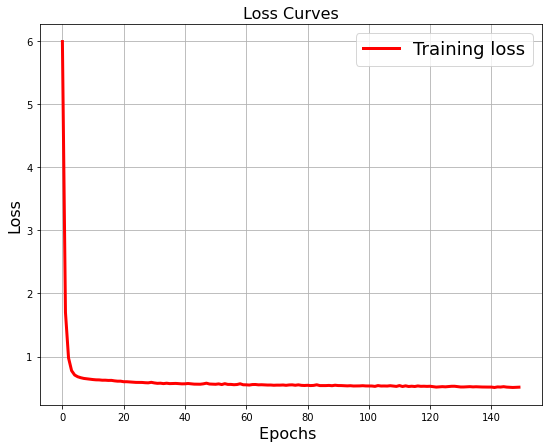

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[9,7])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid(True)

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. 

In [9]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.6940
Accuracy: 69.40


We can see that most rows are correctly predicted. In fact, we would expect about 76% of the rows to be correctly predicted based on our estimated performance of the model in the previous section.

In [10]:
predict_x=model.predict(X) 
predictions = np.round(predict_x).astype(int)


for i in range(20):
    print(' %-55s ENTRY PREDICTED => %d (EXPECTED TO BE %d)  ' % (X[i].tolist(), predictions[i], y[i]))

 [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]        ENTRY PREDICTED => 1 (EXPECTED TO BE 1)  
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]         ENTRY PREDICTED => 0 (EXPECTED TO BE 0)  
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0]         ENTRY PREDICTED => 1 (EXPECTED TO BE 1)  
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0]        ENTRY PREDICTED => 0 (EXPECTED TO BE 0)  
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0]      ENTRY PREDICTED => 0 (EXPECTED TO BE 1)  
 [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0]         ENTRY PREDICTED => 0 (EXPECTED TO BE 0)  
 [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0]        ENTRY PREDICTED => 0 (EXPECTED TO BE 1)  
 [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0]         ENTRY PREDICTED => 1 (EXPECTED TO BE 0)  
 [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0]      ENTRY PREDICTED => 0 (EXPECTED TO BE 1)  
 [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0]          ENTRY PREDICTED => 0 (EXPECTED TO BE 1)  
 [4.0, 110